In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
miss_val=["NaN","n/a","na","N/A","NA","Na","nan"]

In [3]:
df=pd.read_csv(r"C:\Users\SMART\Downloads\diabetes.csv",na_values=miss_val)

### Data interpretation 

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


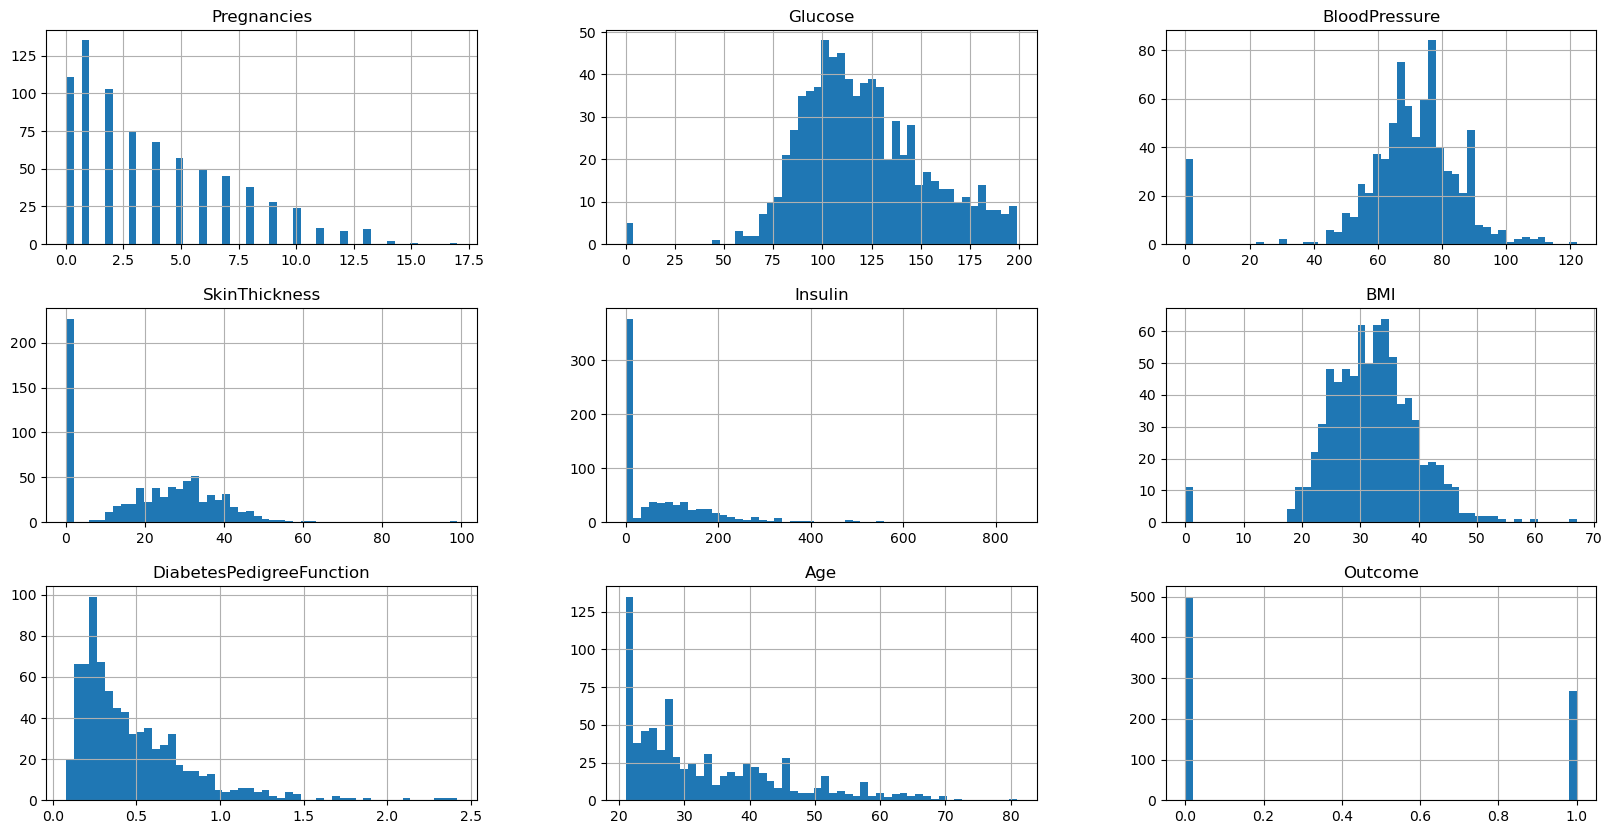

In [7]:
df.hist(figsize=(20,10),bins=50);

In [8]:
# for columns insulin, Bloodpressur,skinThickness,BMI, and Glucose have "0" which will act as null values

### Handling the Null Values 

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

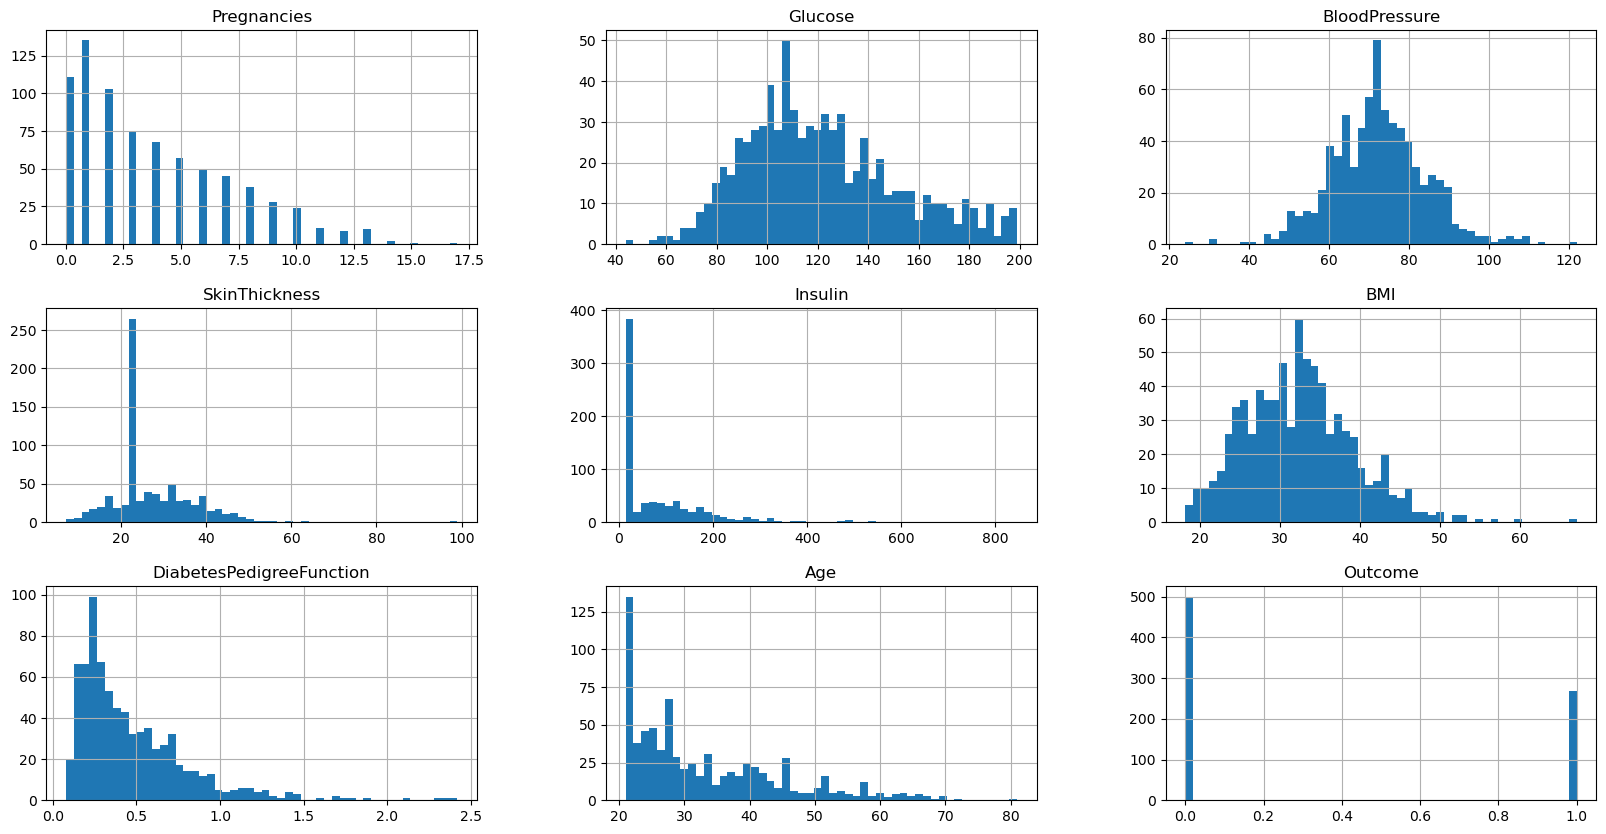

In [10]:
df.hist(figsize=(20,10),bins=50);

In [11]:
df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

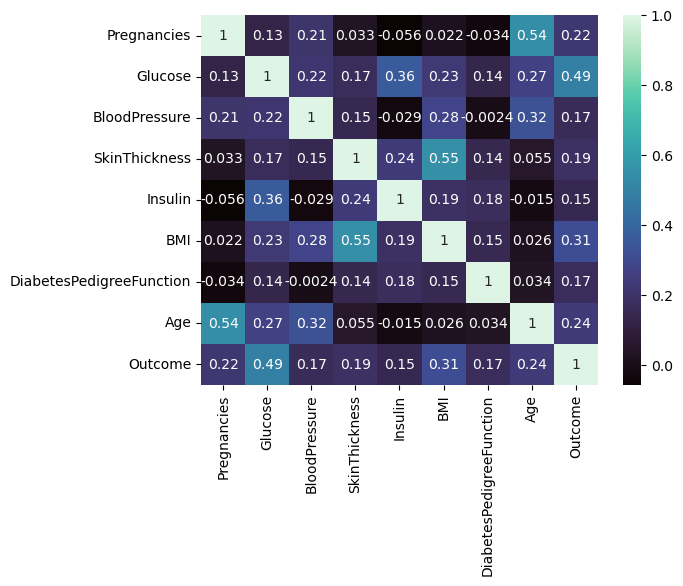

In [12]:
sns.heatmap(df.corr(),annot=True, cmap="mako");

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Train-Test Split

In [14]:
X=df.drop("Outcome",axis=1)
y=df.Outcome

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
Stand=StandardScaler()
X_train_scaled=Stand.fit_transform(X_train)
X_test_scaled=Stand.fit_transform(X_test)

In [18]:
X_train_scaled

array([[-0.85811767,  0.04869548,  0.12833387, ..., -0.66024761,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.89788944,  0.7953984 , ...,  0.40098808,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.9305303 , -0.20519839, ...,  1.65383576,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.08133634, -0.20519839, ..., -0.49811438,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.21243139,  0.12833387, ..., -0.88133837,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.40827655, -0.53873066, ..., -0.05593284,
        -0.01308802, -0.36325717]])

## Model selection

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,f1_score,confusion_matrix

### 1.Logistic Regression

In [20]:
logistic=LogisticRegression()

In [21]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [22]:
log_predict=logistic.predict(X_test)

In [23]:
accuracy_score(y_test,log_predict)

0.7532467532467533

In [24]:
confu=confusion_matrix(y_test,log_predict)
confu

array([[95, 14],
       [24, 21]], dtype=int64)

### for scaled data

In [25]:
logistic.fit(X_train_scaled,y_train)
log_predict_scl=logistic.predict(X_test_scaled)
accuracy_score(y_test,log_predict_scl)

0.7662337662337663

### SVC

In [26]:
kernal=['linear', 'poly', 'rbf', 'sigmoid']
result_svc={}

In [27]:
for kern in kernal:
    supp=SVC(kernel=kern)
    supp.fit(X_train,y_train)
    predict_scv=supp.predict(X_test)
    score=accuracy_score(y_test,predict_scv)
    result_svc[kern]=score

In [28]:
result_svc

{'linear': 0.7662337662337663,
 'poly': 0.7857142857142857,
 'rbf': 0.7662337662337663,
 'sigmoid': 0.4935064935064935}

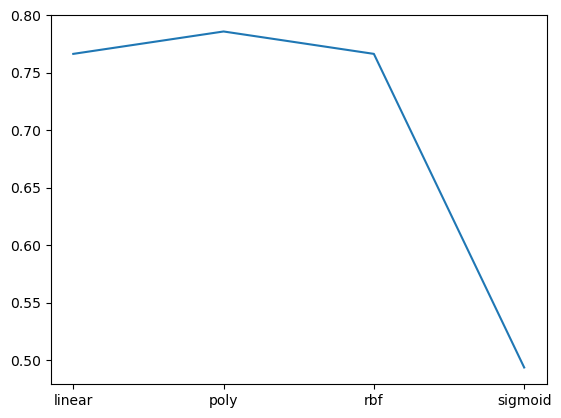

<Figure size 800x600 with 0 Axes>

In [29]:
plt.plot(list(result_svc.keys()),list(result_svc.values()))
plt.figure(figsize=(8,6))
plt.show()

### for scaled data

In [30]:
result_svc_scal={}
for kern in kernal:
    supp=SVC(kernel=kern)
    supp.fit(X_train_scaled,y_train)
    predict_scv_scl=supp.predict(X_test_scaled)
    score_scal=accuracy_score(y_test,predict_scv_scl)
    result_svc_scal[kern]=score_scal
result_svc_scal

{'linear': 0.7597402597402597,
 'poly': 0.7662337662337663,
 'rbf': 0.7467532467532467,
 'sigmoid': 0.6818181818181818}

### KNN

In [31]:
result_knn={}

In [32]:
for x in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    predict_knn=knn.predict(X_test)
    score_knn=accuracy_score(y_test,predict_knn)
    result_knn[x]=score_knn

In [33]:
result_knn

{2: 0.7662337662337663,
 3: 0.7532467532467533,
 4: 0.7207792207792207,
 5: 0.7272727272727273,
 6: 0.7532467532467533,
 7: 0.7532467532467533,
 8: 0.7532467532467533,
 9: 0.7337662337662337}

### for scaled data

In [34]:
result_knn_scal={}
for x in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train_scaled,y_train)
    predict_knn_scal=knn.predict(X_test_scaled)
    score_knn_scal=accuracy_score(y_test,predict_knn_scal)
    result_knn_scal[x]=score_knn_scal
result_knn_scal    

{2: 0.7532467532467533,
 3: 0.7857142857142857,
 4: 0.7922077922077922,
 5: 0.7922077922077922,
 6: 0.7662337662337663,
 7: 0.7662337662337663,
 8: 0.7532467532467533,
 9: 0.7727272727272727}

In [35]:
# best fit is KNN model with 4 or 5 neighbourhood

In [36]:
knn_scal=KNeighborsClassifier(n_neighbors=4)
knn_scal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

## Predicting the Diabetes

In [37]:
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
Pregnancies=input("How many time you got pregnant?")
Glucose=input("What is your Glucose level(44-199)?")
BloodPressure=input("How much is your blood pressur(24-122)?")
SkinThickness=input("What is your Skin Thickness (7-99)?")
Insulin=input("What is your Insulin level (14-846)?")
BMI=input("What is your BMI (18-67)?")
DiabetesPedigreeFunction=input("Diabetes pedigree Function Value")
Age=input("What is Your Age?")
test=[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]

How many time you got pregnant?1
What is your Glucose level(44-199)?89
How much is your blood pressur(24-122)?66
What is your Skin Thickness (7-99)?23
What is your Insulin level (14-846)?94
What is your BMI (18-67)?28.1
Diabetes pedigree Function Value.167
What is Your Age?21


In [38]:
test_scaled=Stand.fit_transform(np.array(test).reshape(1,-1))

In [39]:
pred_test=knn_scal.predict(test_scaled)
if pred_test==0:
    print("No Diabete")
elif pred_test==1:
    print("Have Diabete")

No Diabete
